# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bryan Guok
- **Email:** m002b4ky0877@bangkit.academy
- **ID Dicoding:** bryanguok

## Menentukan Pertanyaan Bisnis

- Kapan waktu puncak penggunaan Bike Sharing?
- Berapa perbandingan jumlah pengguna Bike Sharing yang sudah terdaftar terhadap jumlah pengguna kasual?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
# from google.colab import drive
# drive.mount("/content/drive/")

##### Mengambil Data dari Google Drive

In [9]:
# file = '/content/drive/My Drive/Bangkit/Dicoding/Bike-sharing-dataset/hour.csv'
file = './Bike-sharing-dataset/hour.csv'
df = pd.read_csv(file)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pengambilan data menggunakan data Bike Sharing dalam format csv yang mengandung jam karena data diharapkan dapat menjawab pertanyaan mengenai kapan jam Bike Sharing paling sering digunakan.
- Data yang digunakan juga mengandung langsung nilai atau banyaknya pengguna *casual* dan pengguna yang sudah terdaftar pada Bike Sharing ini.
- Data-data lain yang dikumpulkan yang belum tentu terpakai akan diabaikan, misalnya temperatur, kecepatan angin, dan lain sebagainya yang tidak menjawab pertanyaan bisnis.

### Assessing Data

##### Mengecek apakah ada data kosong, invalid, maupun duplikat yang dapat mengganggu visualisasi data

In [10]:
df_null = df.isnull().sum()
df_null

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df_duplicate = df.duplicated().sum()
df_duplicate

0

**Insight:**
- Data diidentifikasi terlebih dahulu apakah terdapat data yang kosong sehingga datanya tidak dapat digunakan.
- Data kemudian dicari apakah ada data yang tidak sengaja terduplikasi.
- Value dari data yang invalid seharusnya dicek melalui *regex*, namun dalam kasus data ini *regex* tidak dapat digunakan secara langsung karena *regex* memfilter data *invalid* apabila jenis ketidaksahihan data diketahui.
- Pengecekan *outlier* juga tidak dilakukan, karena data yang akan digunakan adalah data waktu (frekuensi terhadap waktu) yang selalu dapat diisi dari 0 hingga 24, dan jumlah pengguna baik yang *casual* maupun *registered* yang digunakan untuk menghitung jumlah diskrit kehadiran pengguna pada saat itu, sehingga analisis data *outlier* tidak diperlukan.


### Cleaning Data

**Insight:**
- Data yang diambilkan disimpulkan tidak bermasalah pada tahap asesmen data, sehingga pembersihan data tidak dilakukan.

## Exploratory Data Analysis (EDA)

### Explore ...

##### Melakukan eksplorasi data menggunakan df.info(), df.describe(), df.coor(), dan menampilkan bagian data yang akan digunakan dengan terlebih dahulu mengelompokkan data menggunakan df.groupby().

##### Sebelum df.coor() digunakan, terlebih dahulu dibuat *dataframe* yang tidak mengandung format yang tidak dapat dibentuk korelasinya terhadap kolom-kolom lainnya, yaitu kolom [\'dteday\'], dengan cara df.drop() terhadap kolom [\'dteday\'].

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Descriptive Statistics:
 

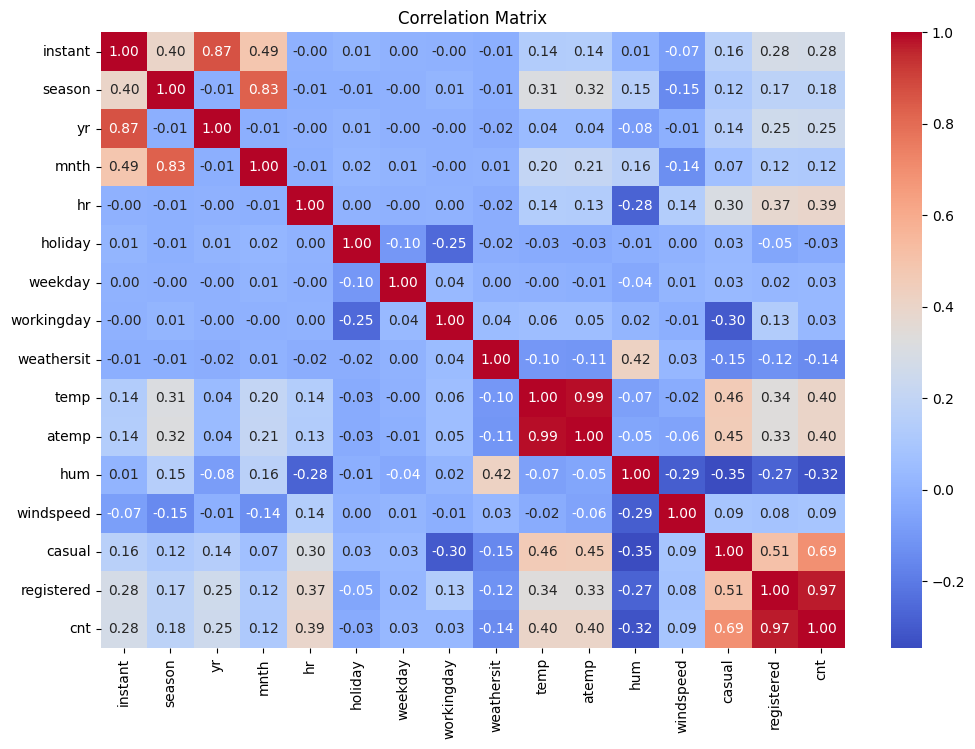


Data Grouping:
    Month  Total_Hours  Casual  Registered
0       1        16715   12042      122891
1       2        15639   14963      136389
2       3        17060   44444      184476
3       4        16550   60802      208292
4       5        17112   75285      256401
5       6        16560   73906      272436
6       7        17112   78157      266791
7       8        16968   72039      279155
8       9        16554   70323      275668
9      10        16755   59760      262592
10     11        16552   36603      218228
11     12        17094   21693      189343


In [12]:
print("Dataset Overview:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe(include='all'))

df_nodate = df
df_nodate.drop(columns=['dteday'])

print("\nCorrelation Analysis:")
correlation_matrix = df_nodate.drop(columns=['dteday']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("\nData Grouping:")
result = df.groupby(by='mnth').agg({
    'hr': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

result.columns = ['Month', 'Total_Hours', 'Casual', 'Registered']

print(result)

**Insight:**
- Digunakan df.info() untuk memperlihatkan informasi mengenai tipe data dan kosong atau tidaknya data tiap kolom
- Digunakan df.describe() untuk memperlihatkan statistika deskriptif tiap kolom data
- Dibuat visualisasi korelasi antar kolom pada data dengan mengabaikan data pada kolom ['dteday'] yang nilainya bukan nilai numerik
- Data dikelompokkan berdasarkan bulannya untuk diperlihatkan jumlah waktu dan banyaknya pengguna

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu puncak penggunaan Bike Sharing?

##### Memvisualisasikan data jam menggunakan histogram agar dapat diketahui berapa kali (frekuensi) kemunculan data penggunaan Bike Sharing pada jam tertentu. Histogram dibuat menggunakan library *seaborn*

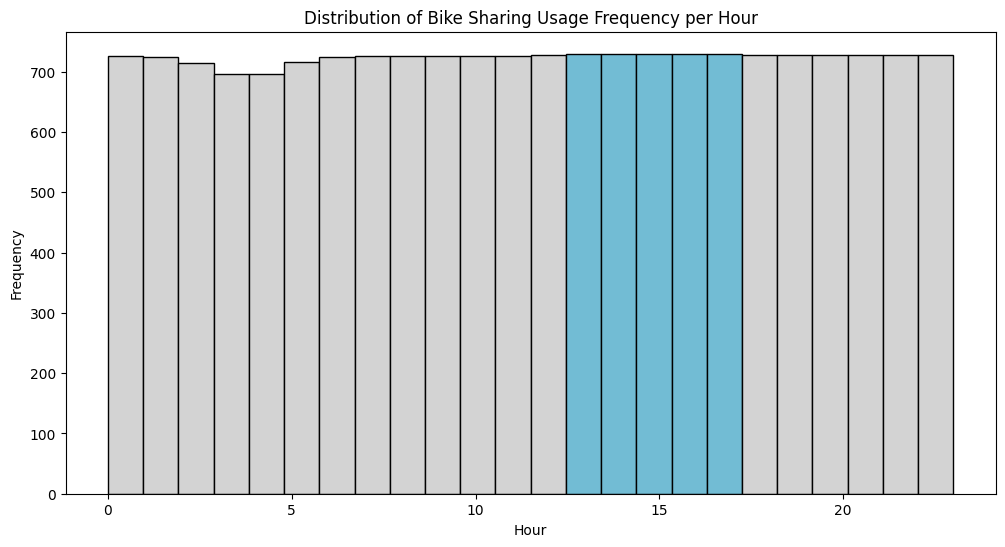

In [21]:
colors = ["#D3D3D3"] * 13 + ["#72BCD4"] * 5 + ["#D3D3D3"] * 6

plt.figure(figsize=(12, 6))
hist = sns.histplot(df['hr'], bins=24)

for bar, color in zip(hist.patches, colors):
    bar.set_facecolor(color)
    
plt.title('Distribution of Bike Sharing Usage Frequency per Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

### Pertanyaan 2: Berapa perbandingan jumlah pengguna Bike Sharing yang sudah terdaftar terhadap jumlah pengguna kasual?

##### Karena ingin mencari tahu perbandingan jumlah pengguna kasual terhadap yang terdaftar, terlebih dahulu data harus dikelompokkan untuk tiap bulannya, bukan per hari, agar visualisasinya dapat terlihat. Data juga dipisahkan terlebih dahulu untuk tahun yang berbeda dengan alasan tujuan visualisasi ingin melihat perbandingan jumlah pengguna, apabila visualisasi data tahun pertama digabungkan dengan tahun kedua, kondisi pada tahun pertama bisa jadi berbeda dengan tahun kedua pada bulan yang sama. Sehingga, data dipantau per bulan untuk tiap tahunnya.

##### Dibuat terlebih dahulu array untuk menampung data tahun yang berbeda, kemudian *dataframe* dipisah per bulannya. Setelah itu, dibuat *dataframe* baru yang berisi data-data yang sudah dipisahkan sebelumnya menggunakan df.melt(). Terakhir, data divisualisasikan per bulan untuk tiap tahunnya menggunakan *bar chart* library *seaborn* agar dapat terlihat komparasi pengguna kasual dan pengguna terdaftar *side-by-side*.

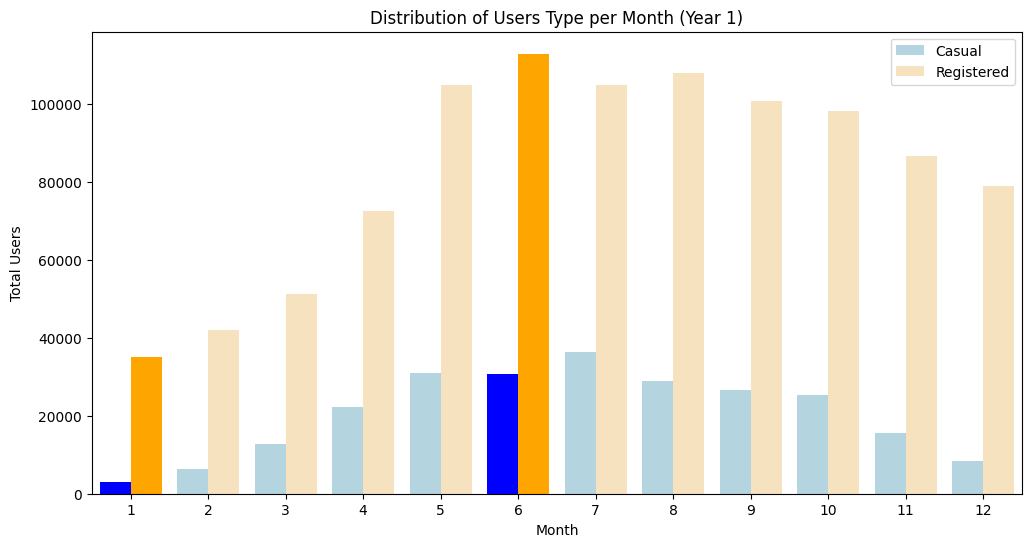

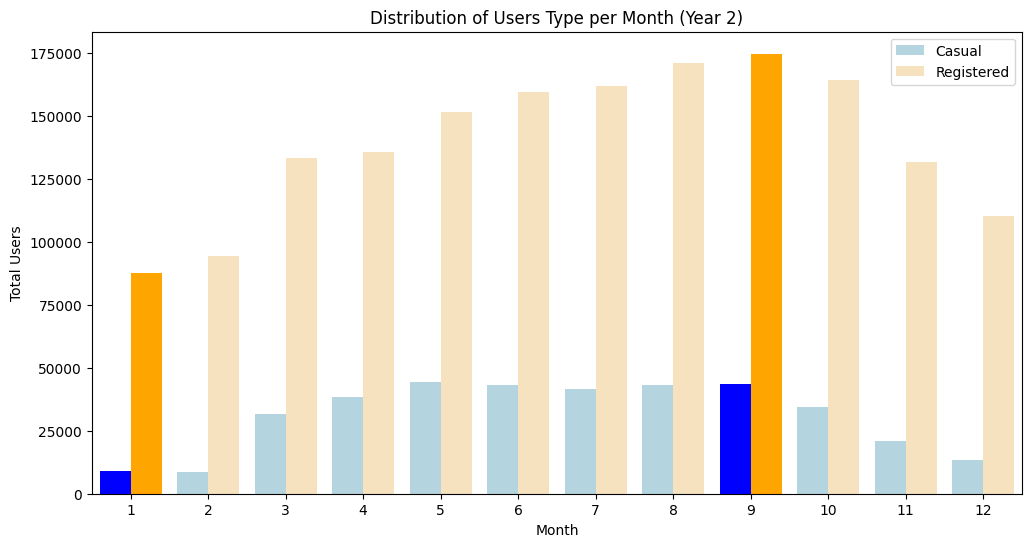

In [39]:
casual_yr1 = []
registered_yr1 = []
casual_yr2 = []
registered_yr2 = []

df_unique_month = df['mnth'].unique()

for i in df_unique_month:
    df_month_filter = df[df['mnth'] == i]

    df_year_0 = df_month_filter[df_month_filter['yr'] == 0]
    df_year_1 = df_month_filter[df_month_filter['yr'] == 1]

    if not df_year_0.empty:
        casual_yr1.append(df_year_0['casual'].sum())
        registered_yr1.append(df_year_0['registered'].sum())

    if not df_year_1.empty:
        casual_yr2.append(df_year_1['casual'].sum())
        registered_yr2.append(df_year_1['registered'].sum())

data_yr1 = pd.DataFrame({
    'Month': df_unique_month,
    'Casual': casual_yr1,
    'Registered': registered_yr1
})

data_yr2 = pd.DataFrame({
    'Month': df_unique_month,
    'Casual': casual_yr2,
    'Registered': registered_yr2
})

data_yr1_melted = pd.melt(data_yr1, id_vars='Month', value_vars=['Casual', 'Registered'], var_name='User_Type', value_name='User_Count')
data_yr2_melted = pd.melt(data_yr2, id_vars='Month', value_vars=['Casual', 'Registered'], var_name='User_Type', value_name='User_Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='User_Count', hue='User_Type',
            data=data_yr1_melted, palette=['#ADD8E6', '#FFE4B5'],
            errorbar=None, dodge=True)

bars = plt.gca().patches
bars[0].set_facecolor('blue')
bars[12].set_facecolor('orange')
bars[5].set_facecolor('blue')
bars[17].set_facecolor('orange') 

plt.title('Distribution of Users Type per Month (Year 1)')
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='User_Count', hue='User_Type',
            data=data_yr2_melted, palette=['#ADD8E6', '#FFE4B5'],
            errorbar=None, dodge=True)

bars = plt.gca().patches
bars[0].set_facecolor('blue')
bars[12].set_facecolor('orange')
bars[8].set_facecolor('blue')
bars[20].set_facecolor('orange') 

plt.title('Distribution of Users Type per Month (Year 2)')
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.legend()
plt.show()

**Insight:**
- Dapat dilihat dari visualisasi data pertama yang dibuat adalah distribusi banyaknya penggunaan Bike Sharing per jamnya, data divisualisasikan melalui histogram agar dapat terlihat secara langsung frekuensinya tiap satuan jam. Visualisasi ini menjawab pertanyaan pertama mengenai waktu puncak penggunaan Bike Sharing, yaitu sekitar pukul 13.00 hingga pukul 17.00, meskipun dari histogram tidak terlihat langsung jumlah pastinya, namun terdapat perbedaan ketinggian yang sangat kecil terhadap jam-jam lainnya.
- Visualisasi data kedua merepresentasikan perbandingan jumlah pengguna Bike Sharing yang kasual vs. yang sudah terdaftar per bulan untuk masing-masing tahun. Visualisasi menggunakan bar plot agar dapat terlihat perbandingan frekuensi yang pengguna kasual terhadap pengguna yang terdaftar. Visualisasi ini telah menjawab secara langsung perbandingan jumlah pengguna. Selisih terjauh pada bulan ke-6 tahun pertama, dan pada bulan ke-9 tahun kedua. Sedangkan selisih jumlah pengguna kasual terhadap pengguna yang sudah terdaftar dicapai pada bulan ke-1 baik pada tahun pertama maupun tahun kedua.
- Data diharapkan dapat digunakan untuk meningkatkan jumlah pengguna, misalnya dengan memberikan diskon pada jam puncak, atau promosi free trial untuk pendaftar akun baru, dan lain sebagainya.

## Conclusion

- Waktu puncak penggunaan Bike Sharing adalah sekitar pukul 13.00 hingga 17.00 dengan jumlah pengguna mencapai lebih dari 700 pengguna
- Perbandingan jumlah pengguna kasual terhadap pengguna yang terdaftar pada tahun pertama mencapai selisih terjauh pada bulan ke-6 tahun pertama, dan pada bulan ke-9 tahun kedua. Sedangkan selisih jumlah pengguna kasual terhadap pengguna yang sudah terdaftar dicapai pada bulan ke-1 baik pada tahun pertama maupun tahun kedua.